In [1]:
from IPython.display import Markdown as md
from IPython.display import SVG
import sympy as sp
from sympy import symbols

x = symbols("x",positive = True)
yp = symbols("y^{\prime}")
y = symbols("y", positive = True)
A = symbols("A", positive = True)
C= symbols("C")
l = symbols("\lambda", negative = True)
s = symbols("s", positive = True)
V = symbols("V", positive = True)

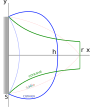

In [2]:
SVG(filename ="drawing.svg")

Minimize surface
$$
dS = \sqrt{1+y^{\prime}} dx
$$
with constant volume
$$
dV = y dx
$$
Functional to minimize
$$
F = S + \lambda V
$$

other constrains:
$$
y(0) = s/2
\\
\lim_{x \to h} y(x) = 0
\\
\lim_{x \to h} y^{\prime}(x) = -\infty
\\
y^{\prime\prime}(x) < 0
$$

$$
F(y^{\prime}, y) = \sqrt{1+(y^{\prime})^2} + \lambda y
$$

Beltrami identity

$$
F - y^{\prime} \frac{\partial F}{\partial y^{\prime}} = C
$$

In [3]:
F = sp.sqrt(1+yp**2) + l*y
second = F.diff(yp)*yp
second_term = r"y^{\prime} \frac{\partial F}{\partial y^{\prime}}"
md(f"$${second_term} = {sp.latex(second)}$$")

$$y^{\prime} \frac{\partial F}{\partial y^{\prime}} = \frac{\left(y^{\prime}\right)^{2}}{\sqrt{\left(y^{\prime}\right)^{2} + 1}}$$

In [4]:
lhs = F - second - C
display(lhs)
lhs = lhs.simplify()
sp.Eq(lhs, 0)


-C + \lambda*y - y^{\prime}**2/sqrt(y^{\prime}**2 + 1) + sqrt(y^{\prime}**2 + 1)

Eq(-C + \lambda*y + 1/sqrt(y^{\prime}**2 + 1), 0)

In [5]:

lim_latex = r"\lim_{x \to h}"
md(rf"$$ {lim_latex} \left({sp.latex(lhs)}\right) = -C \\ C =0 $$")

$$ \lim_{x \to h} \left(- C + \lambda y + \frac{1}{\sqrt{\left(y^{\prime}\right)^{2} + 1}}\right) = -C \\ C =0 $$

$$
x \to h \\ y^{\prime} \to -\infty \\ y \to 0 \\ \lambda y \to 0
\\
 \frac{1}{\sqrt{\left(y^{\prime}\right)^{2} + 1}} \to 0
$$


In [6]:
lhs = lhs.subs(C, 0)
sp.Eq(lhs, 0)

Eq(\lambda*y + 1/sqrt(y^{\prime}**2 + 1), 0)

$$
\lambda < 0
$$

In [7]:
yp_roots = sp.solve(lhs, yp)
display(*[sp.Eq(symbols("y^{\prime}"), root) for root in yp_roots])

Eq(y^{\prime}, -sqrt(-\lambda**2*y**2 + 1)/(\lambda*y))

Eq(y^{\prime}, sqrt(-\lambda**2*y**2 + 1)/(\lambda*y))

In [8]:
pm = symbols("\pm")
yp_ = yp_roots[1].simplify()*pm
dx, dy = symbols("dx dy")
lhs = sp.solve((yp_ - yp).subs(yp, dy/dx), dx)[0]
sp.Eq(lhs, dx)

Eq(\lambda*dy*y/(\pm*sqrt(-\lambda**2*y**2 + 1)), dx)

In [9]:
u = 1 - (l*y)**2
print("substitute")
display(sp.Eq(symbols("u"), u))

du = u.diff(y)
eq=sp.Eq(symbols("du"), du*dy)
display(eq)
dy_ = sp.solve(eq, dy)[0]
display(sp.Eq(symbols("dy"), dy_))

substitute


Eq(u, -\lambda**2*y**2 + 1)

Eq(du, -2*\lambda**2*dy*y)

Eq(dy, -du/(2*\lambda**2*y))

In [10]:
u_ = symbols("u")
rhs = x-A
integrand = pm*1/(2*l*sp.sqrt(u_))
print("integrand:")
display(integrand)
print("after integration")
lhs = sp.integrate(integrand, u_)
eq = sp.Eq(lhs, rhs)
display(eq)
print("finally, after substitution")
eq = eq.subs(u_, u)
display(eq)


integrand:


\pm/(2*\lambda*sqrt(u))

after integration


Eq(\pm*sqrt(u)/\lambda, -A + x)

finally, after substitution


Eq(\pm*sqrt(-\lambda**2*y**2 + 1)/\lambda, -A + x)

In [11]:
y2 = symbols("y^2", positive = True)
lhs2 = (lhs.subs(u_, u)**2).subs(pm, 1).subs(y, sp.sqrt(y2))
rhs2 = rhs**2
eq = sp.Eq(lhs2, rhs2)
display(eq)

Eq((-\lambda**2*y^2 + 1)/\lambda**2, (-A + x)**2)

In [12]:
y2_ = sp.solve(eq, y2)[0]
eq_y2 = sp.Eq(y2, y2_)
display(eq_y2)

Eq(y^2, -(A - x)**2 + \lambda**(-2))

In [13]:
h = symbols("h", positive = True)
eq_s = eq_y2.subs(x, 0).subs(y2, s**2)
display(eq_s)

eq_0 = eq_y2.subs(x, h).subs(y2, 0)
display(eq_0)


Eq(s**2, -A**2 + \lambda**(-2))

Eq(0, -(A - h)**2 + \lambda**(-2))

In [14]:
l2_inv = symbols("1/\lambda^2")
eq_s_ = eq_s.subs(l, sp.sqrt(1/(l2_inv)))
l2_inv_ = sp.solve(eq_s_, l2_inv)[0]
display(sp.Eq(l2_inv, l2_inv_))

eq_0_ = eq_0.subs(l, sp.sqrt(1/(l2_inv))).subs(l2_inv, l2_inv_).simplify()
display(eq_0_)

A_ = sp.solve(eq_0_, A)[0]
display(sp.Eq(A, A_))

y2__ = y2_.subs(A, A_)
eq_y2_s = sp.Eq(y2, y2__)
display(eq_y2_s)

eq_y2_s=eq_y2_s.subs(x, 0).subs(y2, s**2).subs(l, sp.sqrt(1/(l2_inv)))
display(eq_y2_s)

l2_inv_ = sp.solve(eq_y2_s, l2_inv)[0]
display(sp.Eq(l2_inv, l2_inv_))

y2__ = y2__.subs(l, sp.sqrt(1/(l2_inv))).subs(l2_inv, l2_inv_).subs(A, A_)
sp.Eq(y2, y2__)

y2__ = y2__.simplify()
sp.Eq(y2, y2__)


Eq(1/\lambda^2, A**2 + s**2)

Eq(A**2 + s**2 - (A - h)**2, 0)

Eq(A, (h**2 - s**2)/(2*h))

Eq(y^2, -(-x + (h**2 - s**2)/(2*h))**2 + \lambda**(-2))

Eq(s**2, 1/\lambda^2 - (h**2 - s**2)**2/(4*h**2))

Eq(1/\lambda^2, h**2/4 + s**2/2 + s**4/(4*h**2))

Eq(y^2, h*x + s**2 - x**2 - s**2*x/h)

In [15]:
y_ = sp.sqrt(y2__)
display(sp.Eq(y, y_))

Eq(y, sqrt(h*x + s**2 - x**2 - s**2*x/h))

In [28]:
yS = sp.integrate(sp.sqrt(1+y_.diff(x)**2), x).simplify()

In [32]:
(y_.diff(x)**2).simplify()

(h*(-h + 2*x) + s**2)**2/(4*h*(h*(h*x + s**2 - x**2) - s**2*x))

In [255]:
import numpy as np
import functools

@functools.lru_cache()
def Y_h(s_, h_):
    def func(x_):
        if (x_<0) or (x_>h_):
            return np.nan
        else:
            return sp.N(y_.subs({s:s_, h:h_, x: x_}))
    return func

def S_h(s_, h_):
    dS = sp.sqrt(1+y_.diff(x)**2).simplify().radsimp()#dx
    dS = dS.subs(s,s_).subs(h, h_)
    #return complex(sp.N(sp.integrate(dS, (x, 0, h)))).real
    return sp.N(sp.integrate(dS, (x, 0, h_-1e-5)))

def V_h(s_, h_):
    dV = y_.subs({s:s_, h:h_})
    #return complex(sp.N(sp.integrate(dV, (x, 0, h_-1e-5)))).real
    return sp.N(sp.integrate(dV, (x, 0, h_-1e-5)))

# %%

@functools.lru_cache()
def h_V(s_, V_):
    from scipy.optimize import brentq
    def fsolve(h_):
        return V_h(s_, h_)-V_
    h_min = 0
    h_max = 2*V_/s_ #triangle
    return brentq(fsolve, h_min, h_max)


@functools.lru_cache()
def Y(s_, V_):
    h_ = h_V(s_, V_)
    print(f"h = {h_}")
    return Y_h(s_, h_)


@functools.lru_cache()
def S(s_, V_):
    h_ = h_V(s_, V_)
    return S_h(s_, h_)